<a href="https://colab.research.google.com/github/slendrac123/AlgorithmsUN2023II/blob/main/FibonacciTimesGroup8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fibonacci sequence

Fibonacci  - https://en.wikipedia.org/wiki/Fibonacci Leonardo Bonacci, Leonardo of Pisa, or Leonardo Bigollo Pisano ('Leonardo the Traveller from Pisa')  

$$
 f_n = \left\{
 \begin{array}{lll}
 0& if & n=0\\
 1& if & n=1\\
 f_{n-1} +   f_{n-2} & if & n> 1 \text{ (otherwise)}\\
 \end{array}
   \right.
$$



## Fibonacci recursive algorithm $O\left( \left(  \frac{1+\sqrt(5)}{2}  \right)^n  lg\ n\right)$ [Relaxed asymptotic bound $O(2^n\ lg\ n)$]

In [1]:
# fibR - Fibonacci Recursive O( ( (1+sqrt(5)/2 )^n lg n ) [Relaxed asymptotic bound O(2^n lg n)]
def fibR(n):
    if n==0 :
        return 0
    if n==1 :
        return 1
    return fibR(n-1)+fibR(n-2)    # for large n´s  the addition will take lg n stetp because the numebers are very large

https://www.geeksforgeeks.org/time-process_time-function-in-python/

In [2]:
from time import process_time
n=5
t0 = process_time()
k = fibR(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 5 fib( 5 )= 5 time 5.932900000016339e-05 seconds process time


In [3]:
from time import process_time
n=10
t0 = process_time()
k = fibR(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 10 fib( 10 )= 55 time 0.00015021400000003737 seconds process time


In [4]:
from time import process_time
n=17
t0 = process_time()
k = fibR(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 17 fib( 17 )= 1597 time 0.0013713739999998698 seconds process time


In [5]:
from time import process_time
n=40
t0 = process_time()
k = fibR(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 40 fib( 40 )= 102334155 time 63.797986894999994 seconds process time


# **Plot of the recursive Fibonacci execution time for n in [0,50]**

Usando el algoritmo dado de fibonacci, el tiempo de ejecución se vuelve demasiado largo (+ 10 minutos), Por lo que se busco un algoritmo más eficiente.

In [6]:
def efficient_fibonacci(n, fib_cur):
 # Base cases: if n is 0 or 1, return n
 if n == 0 or n == 1:
  return n

 # Check if the result for n is already in fib_cur
 if n in fib_cur:
  return fib_cur[n]

 # If not, calculate the Fibonacci number for n using recursion
 # Store the result in fib_cur to avoid redundant calculations
 else:
  fib_cur[n] = efficient_fibonacci(n - 1, fib_cur) + efficient_fibonacci(n - 2, fib_cur)

  # Return the calculated Fibonacci number for n
  return fib_cur[n]


In [30]:
from time import process_time

def fibonacci_time(n):
  t0 = process_time()
  fib_cur = {}
  efficient_fibonacci(n, fib_cur)
  tf =process_time()
  return tf-t0

In [36]:
fibonacci_time(50)

1.514299999882951e-05

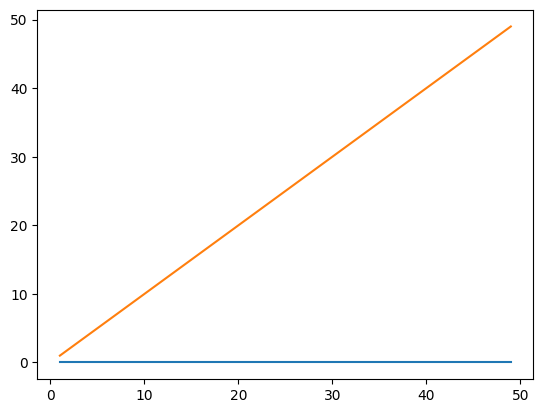

In [42]:
import math
import matplotlib.pyplot as plt
timeList = [0]
n = 50
for i in range(1,n):
  timeList.append(fibonacci_time(i))

plt.plot(range(1,n),timeList[1:])
plt.plot(range(1,n),range(1,n));


# **Iterative Fibonacci linear and iterative Fibonacci logarithmic execution time n in [0,1000]**

In [33]:
from time import process_time

def fibonacci_time(n):
  t0 = process_time()
  if n==0 :
    return 0
  a =1
  b = 1
  for i in range(1, n):
    a, b = b, a+b
  tf =process_time()
  return tf-t0

In [40]:
fibonacci_time(100)

2.0517999999469794e-05

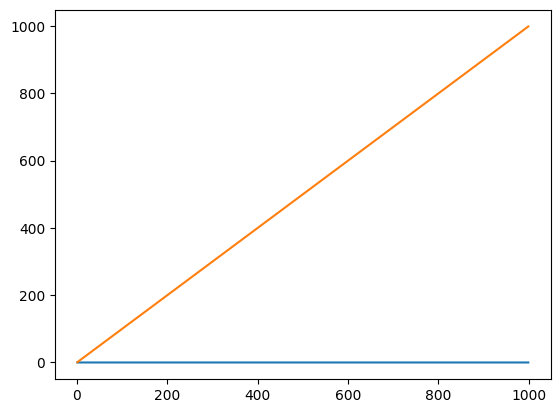

In [41]:
import math
import matplotlib.pyplot as plt
timeList = [0]
n = 1000
for i in range(1,n):
  timeList.append(fibonacci_time(i))

plt.plot(range(1,n),timeList[1:])
plt.plot(range(1,n),range(1,n));


The ratio between time to calculate $f_{n+1}$, noted $T(f_{n})$  and the time to calculate $f_{40}$,$T(f_{41})$  is $\approx \frac{1+\sqrt(5)}{2}$

$$\frac{T(f_{n+1})}{T(f_{n})}\approx \frac{1+\sqrt(5)}{2} $$

In [44]:
import math
(1+math.sqrt(5))/2

1.618033988749895

## Estimated time to recursively caculate of the Fibonacci $f_{n}$

Assuming that the recusrive caculation of the Fibonacci $f_{41}$ takes approximately one minute and assuming the time to calcualte the next Fibonacci numbres is the double of the previus, so  $f_{42}$ will take 2 minutes,  $f_{43}$ will take 4 minutes, $f_{44}$ will take  8 minutes and so on.


So to calulate $f_{n}$ it will take
$$ 2^{(n-41)} \text{ minutes for } n \ge 41$$

In [45]:
print("f_n","{0:>25}".format("Minutes"),"{0:>25}".format("Hours"),"{0:>25}".format("Days"),  "{0:>25}".format("Years"),"{0:>25}".format("Centuries"),"{0:>25}".format("Mileniuns"))
for n in range(41,101):
  tmins = 2**(n-41)
  print(format("f_"+str(n),'5'),"{0:>25}".format(round(tmins,0)), "{0:>25}".format(tmins/60),"{0:>25}".format(tmins/(60*24)),"{0:>25}".format(tmins/(60*24*365)),"{0:>25}".format(tmins/(60*24*365*100)),"{0:>25}".format(tmins/(60*24*365*1000)))

f_n                   Minutes                     Hours                      Days                     Years                 Centuries                 Mileniuns
f_41                          1      0.016666666666666666     0.0006944444444444445     1.902587519025875e-06     1.902587519025875e-08     1.902587519025875e-09
f_42                          2       0.03333333333333333      0.001388888888888889      3.80517503805175e-06      3.80517503805175e-08      3.80517503805175e-09
f_43                          4       0.06666666666666667      0.002777777777777778       7.6103500761035e-06       7.6103500761035e-08       7.6103500761035e-09
f_44                          8       0.13333333333333333      0.005555555555555556       1.5220700152207e-05       1.5220700152207e-07       1.5220700152207e-08
f_45                         16       0.26666666666666666      0.011111111111111112       3.0441400304414e-05       3.0441400304414e-07       3.0441400304414e-08
f_46                         3

## Given a time in minutes which is the largets Fibonacci $f_{n}$ that be


calculated recusrively

Time in minutes $T$

$$ 2^{(n-41)}<T$$


$$ \lg\left(2^{(n-41)}\right) <\lceil\lg(T)\rceil$$

$$ n-41 <\lceil\lg(T)\rceil$$

$$ n <\lceil\lg(T)\rceil+41$$

In [46]:
# Max n in 1 year = 60*24*365 minutes

import math
math.ceil(math.log2(60*24*365))+41

61

In [47]:
# Max n 100 years 60*24*365*100 minutes

import math
math.ceil(math.log2(60*24*365*100))+41

67

In [48]:
# Max n 1000 years 60*60*24*360*100 minutes

import math
math.ceil(math.log2(60*24*365*1000))+41

70

In [49]:
# Max f_n im 1.000.000 years 60*24*365*1000000 minutes

import math
math.ceil(math.log2(60*24*360*1000000))+41

80

In [50]:
# Max n in 1000.000.000 years 60*24*365*1000000000 minutes

import math
math.ceil(math.log2(60*24*360*1000000000))+41

90

## Fibonacci analytical solution

The Fibonacci sequence is the solution of the homogenous linear difference equation or  homogenous linear recurrence relation  https://en.wikipedia.org/wiki/Linear_difference_equation

$$
f_n =  f_{n-1} + f_{n-2} \ \ \ \ \ \ \ \text{if}\ \ \ \ \ n> 1
$$
with intial conditions
$$
f_0 =0 \text{ and }f_1 = 1\
$$

All linear difference equations have a solution of the from  $\lambda^n$
$$
f_n = \lambda^n
$$
so
$$
\lambda^n =  \lambda^{n-1} + \lambda^{n-2}
$$
divding by $\lambda^{n-2} $
$$
\lambda^2 -  \lambda -  1 = 0
$$
then
$$
\lambda = \frac{1 \pm \sqrt{5}}{2}
$$
therefore
$$
f_n =  A \left( \frac{1 + \sqrt{5}}{2} \right)^n  + B \left(\frac{1 - \sqrt{5}}{2} \right)^n
$$
we find $A$ and $B$ with initial conditions
$$
f_0 = 0  = A \left( \frac{1 + \sqrt{5}}{2} \right)^0  + B \left(\frac{1 - \sqrt{5}}{2} \right)^0 = A+B
$$
so
$$
B = -A
$$
and
$$
f_1 = 1  = A \left( \frac{1 + \sqrt{5}}{2} \right)^1  + B \left(\frac{1 - \sqrt{5}}{2} \right)^1 = A \left( \frac{1 + \sqrt{5}}{2} \right)  - A \left(\frac{1 - \sqrt{5}}{2} \right) = A \sqrt{5}
$$
so
$$
A =\frac{1}{\sqrt{5}}
$$
then
$$
f_n =  \frac{1}{\sqrt{5}} \left( \frac{1 + \sqrt{5}}{2} \right)^n  - \frac{1}{\sqrt{5}} \left(\frac{1 - \sqrt{5}}{2} \right)^n
$$

In [51]:
import math
def fibA(n):
  r5= math.sqrt(5)
  return  (1/r5)*((1 + r5 )/2)**n - (1/r5)*((1 - r5 )/2)**n

In [52]:
 for n in range(0, 10):
   print("f_",n," =",fibA(n),"round(f_",n,",0) =",round(fibA(n),0))

f_ 0  = 0.0 round(f_ 0 ,0) = 0.0
f_ 1  = 1.0 round(f_ 1 ,0) = 1.0
f_ 2  = 0.9999999999999999 round(f_ 2 ,0) = 1.0
f_ 3  = 2.0 round(f_ 3 ,0) = 2.0
f_ 4  = 3.0000000000000004 round(f_ 4 ,0) = 3.0
f_ 5  = 5.000000000000001 round(f_ 5 ,0) = 5.0
f_ 6  = 8.000000000000002 round(f_ 6 ,0) = 8.0
f_ 7  = 13.000000000000004 round(f_ 7 ,0) = 13.0
f_ 8  = 21.000000000000004 round(f_ 8 ,0) = 21.0
f_ 9  = 34.000000000000014 round(f_ 9 ,0) = 34.0


[Fibonacci Spreadsheet](https://github.com/gjhernandezp/algorithms/blob/master/AnalysisOfAlgorithms/fib.csv)



In [53]:
# Counting recursive calls

# fibR - Fibonacci Recursive O( ( (1+sqrt(5)/2 )^n lg n ) [Relaxed asymptotic bound O(2^n lg n)]
def fibR_steps(n):
  def fibR(n):
      global steps
      steps +=1
      if n==0 :
          return 0
      steps +=1
      if n==1 :
          return 1

      steps +=1
      return fibR(n-1)+fibR(n-2)    # for large n´s  the addition will take lg n stetp because the numebers are very large
  global steps
  steps = 0
  fibR(n)
  return steps

## The time complexity of Fibonacci recursive algorithm

The time complexity (running time in a RAM - number of elementary instructions) of the Fibonacci recursive algorithm

```(phyton)
def fibR(n):
    if n==0 :
        return 0
    if n==1 :
        return 1
    return fibR(n-1)+fibR(n-2)
```
is
$$
T(n)=  T(n-1) + T(n-2)  + 3 \ \ \ \ \ \ \ \text{if}\ \ \ \ \ \ n> 1
$$

Changing the notation $T(n) = t_n$ this is an inhomogenous linear difference equation or recurrence relation https://en.wikipedia.org/wiki/Linear_difference_equation
$$
t_n =  t_{n-1} + t_{n-2} + 3\ \ \ \ \ \ \ \text{if}\ \ \ \ \ \ n> 1
$$
with intial conditions
$$
t_0 =1, t_1 = 2 \text{ and } t_2 = 6   \
$$

All inhomogenous linear difference equations  of the from
$$
a_n t_n + a_{n-1} t_{n-1} + a_{n-1} t_{n-2} + \cdots + a_{n-k} t_{n-k} = b^n p(n)
$$
with $b$ constant, $p(n)$ polynomial of degree $d$ and $k$ initial condition have a the solution of the from
$$
(a_n t_n + a_{n-1} t_{n-1} + a_{n-1} t_{n-2} + \cdots + a_{n-k} t_{n-k}) (t-b)^{d+1} = 0
$$
In our case
$$
t_n -  t_{n-1} - t_{n-2} = 3 = 1^n 3n^0
$$
so $ b=1$ and $d=0$, so we have $\lambda =1$ with multiplicity $1$
$$
t_n =  A \left( \frac{1 + \sqrt{5}}{2} \right)^n  + B \left(\frac{1 - \sqrt{5}}{2} \right)^n + C 1^n
$$
we find $A$ $B$ and $C$ with initial conditions
$$
\begin{array}{lll}
A + B + C &=&  1\\
 A \left( \frac{1 + \sqrt{5}}{2} \right) + B\left( \frac{1 - \sqrt{5}}{2} \right) + C  &=&  2 \\
A \left( \frac{1 + \sqrt{5}}{2} \right)^2 + B\left( \frac{1 - \sqrt{5}}{2} \right)^2 + C  &=& 6
\end{array}
$$
so
$$
\begin{array}{lll}
A &=&  2 + \frac{3}{\sqrt(5)}\\
B &=&  2 - \frac{3}{\sqrt(5)} \\
C &=&  -3
\end{array}
$$
then
$$
t_n = T(n)=   \left(2 + \frac{3}{\sqrt(5)}\right) \left( \frac{1 + \sqrt{5}}{2} \right)^n  + \left(2 - \frac{3}{\sqrt(5)}\right) \left(\frac{1 - \sqrt{5}}{2} \right)^n - 3 =  O\left( \left(\frac{1 + \sqrt{5}}{2} \right)^n \right) = O \left(1.6180339887499^n \right)
$$
That is aproximated with a very relaxed asymptotic bound by
$$ t_n = T(n) =  O \left( 2^n \right)$$

Having into account that  for large $n$´s  the addition is not a elementary instructions because the numbers are very large  and  will take $lg\ n$ stetps, then running time is
$$
t_n = T(n)=  O \left(\left( \frac{1 + \sqrt{5}}{2} \right)^n\ lg\ n  \right) = O \left( 1.6180339887499^n\ lg\ n \right)
$$
aproximated with a very relaxed asymptotic bound by
$$
t_n = T(n)=  O \left( 2^n\ lg\ n \right)
$$

## Number of recursive calls in the Fibonacci recursive algorithm

The number of recursive calls in the Fibonacci recursive algorithm

```(phyton)
def fibR(n):
    if n==0 :
        return 0
    if n==1 :
        return 1
    return fibR(n-1)+fibR(n-2)
```
is
$$
T(n)=  T(n-1) + T(n-2)  + 3 \ \ \ \ \ \ \ \text{if}\ \ \ \ \ \ n> 1
$$

Changing the notation $T(n) = t_n$ this is an inhomogenous linear difference equation or recurrence relation https://en.wikipedia.org/wiki/Linear_difference_equation
$$
t_n =  t_{n-1} + t_{n-2} + 3\ \ \ \ \ \ \ \text{if}\ \ \ \ \ \ n> 1
$$
with intial conditions
$$
t_0 =1, t_1 = 2 \text{ and } t_2 = 6   \
$$

All inhomogenous linear difference equations  of the from
$$
a_n t_n + a_{n-1} t_{n-1} + a_{n-1} t_{n-2} + \cdots + a_{n-k} t_{n-k} = b^n p(n)
$$
with $b$ constant, $p(n)$ polynomial of degree $d$ and $k$ initial condition have a the solution of the from
$$
(a_n t_n + a_{n-1} t_{n-1} + a_{n-1} t_{n-2} + \cdots + a_{n-k} t_{n-k}) (t-b)^{d+1} = 0
$$
In our case
$$
t_n -  t_{n-1} - t_{n-2} = 1 = 1^n 3 n^0
$$
so $ b=1$ and $d=0$, so we have $\lambda =1$ with multiplicity $1$
$$
t_n =  A \left( \frac{1 + \sqrt{5}}{2} \right)^n  + B \left(\frac{1 - \sqrt{5}}{2} \right)^n + C 1^n
$$
we find $A$ $B$ and $C$ with initial conditions
$$
\begin{array}{lll}
A + B + C &=&  1\\
 A \left( \frac{1 + \sqrt{5}}{2} \right) + B\left( \frac{1 - \sqrt{5}}{2} \right) + C  &=&  2 \\
A \left( \frac{1 + \sqrt{5}}{2} \right)^2 + B\left( \frac{1 - \sqrt{5}}{2} \right)^2 + C  &=& 6
\end{array}
$$
so
$$
\begin{array}{lll}
A &=&  2 + \frac{3}{\sqrt(5)}\\
B &=&  2 - \frac{51}{\sqrt(5)} \\
C &=&  -3
\end{array}
$$
then
$$
t_n = T(n)=   \left(2 + \frac{3}{\sqrt(5)}\right) \left( \frac{1+ \sqrt{5}}{2} \right)^n  + \left(2 - \frac{3}{\sqrt(5)}\right) \left(\frac{1 - \sqrt{5}}{2} \right)^n - 3 =  O\left( \left(\frac{1 + \sqrt{5}}{2} \right)^n \right) = O \left(1.6180339887499^n \right)
$$
That is aproximated with a very relaxed asymptotic bound by
$$ t_n = T(n) =  O \left( 2^n \right)$$


In [54]:
# Counting recursive calls

# fibR - Fibonacci Recursive O( ( (1+sqrt(5)/2 )^n lg n ) [Relaxed asymptotic bound O(2^n lg n)]
def fibR_steps(n):
  def fibR(n):
      global steps
      steps +=1
      if n==0 :
          return 0
      steps +=1
      if n==1 :
          return 1

      steps +=1
      return fibR(n-1)+fibR(n-2)    # for large n´s  the addition will take lg n stetp because the numebers are very large
  global steps
  steps = 0
  fibR(n)
  return steps

In [55]:
print (fibR_steps(0))
print (fibR_steps(1))
print (fibR_steps(2))
print (fibR_steps(3))
print (fibR_steps(4))
print (fibR_steps(5))
print (fibR_steps(6))
print (fibR_steps(7))

1
2
6
11
20
34
57
94


[Fibonacci Spreadsheet](https://github.com/gjhernandezp/algorithms/blob/master/AnalysisOfAlgorithms/fib.csv)

# Fibonacci iterartive algoritm (forward) $O(n\ lgn)$

In [56]:
# fibI - Fibonacci Iterartive (forward) O(n lgn)
def fibI(n):
    if n==0 :
        return 0
    a, b = 0, 1
    for i in range(1, n):
        a, b = b, a+b
    return b

In [57]:
fibI(46)

1836311903

In [58]:
fibI(100)

354224848179261915075

In [59]:
fibI(104)

2427893228399975082453

In [60]:
fibI(103)

1500520536206896083277

In [61]:
fibI(105)

3928413764606871165730

In [62]:
math.log10(fibI(100))

20.549279022829865

In [63]:
from time import process_time
n=10
t0 = process_time()
k = fibI(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 10 fib( 10 )= 55 time 8.982100000309856e-05 seconds process time


In [64]:
from time import process_time
n=100
t0 = process_time()
k = fibI(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 100 fib( 100 )= 354224848179261915075 time 9.95219999992969e-05 seconds process time


In [65]:
from time import process_time
n=1000
t0 = process_time()
k =fibI(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 1000 fib( 1000 )= 43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875 time 0.00026136699999312896 seconds process time


In [66]:
from time import process_time
n=1001
t0 = process_time()
k =fibI(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 1001 fib( 1001 )= 70330367711422815821835254877183549770181269836358732742604905087154537118196933579742249494562611733487750449241765991088186363265450223647106012053374121273867339111198139373125598767690091902245245323403501 time 0.000252359000000979 seconds process time


In [67]:
from time import process_time
n=1002
t0 = process_time()
k =fibI(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 1002 fib( 1002 )= 113796925398360272257523782552224175572745930353730513145086634176691092536145985470146129334641866902783673042322088625863396052888690096969577173696370562180400527049497109023054114771394568040040412172632376 time 0.00036152700000968707 seconds process time


# Fibonacci memoization (dynamic programming)  algoritm  (backward) $O(n\ lgn)$

In [68]:
# fibI - Fibonacci Memoization (dynamic programming) (backward) O(n lg n)

def fibM(n):
    memo = {}
    def fib(n):
        if n==0 :
            return 0
        if n==1 :
            return 1
        if (n-2) not in memo:
            memo[n-2] = fib(n-2)
        if (n-1) not in memo:
            memo[n-1] = fib(n-1)
        return memo[n-1] + memo[n-2]
    return fib(n)

In [69]:
from time import process_time
n=10
t0 = process_time()
k = fibM(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 10 fib( 10 )= 55 time 9.070600000882223e-05 seconds process time


In [70]:
from time import process_time
n=100
t0 = process_time()
k = fibM(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 100 fib( 100 )= 354224848179261915075 time 0.00019193900000402664 seconds process time


In [71]:
from time import process_time
n=1000
t0 = process_time()
k = fibM(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 1000 fib( 1000 )= 43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875 time 0.001730825999999297 seconds process time


In [72]:
from time import process_time
n=10
t0 = process_time()
k = fibA(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 10 fib( 10 )= 55.00000000000002 time 6.264400001043668e-05 seconds process time


In [73]:
from time import process_time
n=100
t0 = process_time()
k = fibA(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 100 fib( 100 )= 3.542248481792631e+20 time 9.844699999916884e-05 seconds process time


In [74]:
from time import process_time
n=1000
t0 = process_time()
k = fibA(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 1000 fib( 1000 )= 4.3466557686938915e+208 time 0.0001123429999978498 seconds process time


# Fibonacci  binary exponentiation matrix algorithm $O(lg^2 n) $

The Fibonacci Q-matrix | Lecture 6 | Fibonacci Numbers and the Golden Ratio https://youtu.be/lTHVwsHJrG0

Exercise 0.4. Dasgupta S., Papadimitriou C., Vazirani U. , “Algorithms” , McGraw Hill, 2007.

Fast matrix solution https://stackoverflow.com/a/40117659

This is a superfast solution refer to https://stackoverflow.com/a/23462371/3700852

You can read some more about involved math here https://en.wikipedia.org/wiki/Fibonacci_number#Matrix_form

Efficient calculation of Fibonacci series https://stackoverflow.com/questions/18172257/efficient-calculation-of-fibonacci-series

Python: Compute a Huge Fibonacci Number Modulo m https://stackoverflow.com/questions/40096097/python-compute-a-huge-fibonacci-number-modulo-m#:~:text=Pisano%20periods%20follows%20a%20Fibonacci,in%20finding%20the%20Pisano%20period.

Binary Exponentiation https://cp-algorithms.com/algebra/binary-exp.html

Exponentiation by squaring https://en.wikipedia.org/wiki/Exponentiation_by_squaring

In [75]:
# Fibonacci fast matrix O(lg^2 n) - https://stackoverflow.com/a/40117659

def fib_fast_matrix(n):

    if n==0: return 0

    # Initialize a matrix [[1,1],[1,0]]
    v1, v2, v3 = 1, 1, 0
    # Perform fast exponentiation of the matrix (quickly raise it to the nth power)
    for rec in bin(n)[3:]:
        calc = (v2*v2)
        v1, v2, v3 = (v1*v1+calc) , ((v1+v3)*v2) , (calc+v3*v3)
        if rec == '1': v1, v2, v3 = (v1+v2), v1, v2
    return v2;

In [76]:
 for n in range(0, 20):
   print(fib_fast_matrix(n))

0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


In [77]:
from time import process_time
n=10
t0 = process_time()
k = fib_fast_matrix(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 10 fib( 10 )= 55 time 8.782400000484358e-05 seconds process time


In [78]:
from time import process_time
n=100
t0 = process_time()
k = fib_fast_matrix(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 100 fib( 100 )= 354224848179261915075 time 0.0001050829999940106 seconds process time


In [79]:
from time import process_time
n=1000
t0 = process_time()
k = fib_fast_matrix(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 1000 fib( 1000 )= 43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875 time 0.00011197899999615402 seconds process time


In [82]:
from time import process_time
n=10000
m=10
t0 = process_time()
k = fib_fast_matrix(n)
tf =process_time()
print("n=",n,"fib(",n,")=",k,"time",tf - t0, "seconds process time")

n= 10000 fib( 10000 )= 33644764876431783266621612005107543310302148460680063906564769974680081442166662368155595513633734025582065332680836159373734790483865268263040892463056431887354544369559827491606602099884183933864652731300088830269235673613135117579297437854413752130520504347701602264758318906527890855154366159582987279682987510631200575428783453215515103870818298969791613127856265033195487140214287532698187962046936097879900350962302291026368131493195275630227837628441540360584402572114334961180023091208287046088923962328835461505776583271252546093591128203925285393434620904245248929403901706233888991085841065183173360437470737908552631764325733993712871937587746897479926305837065742830161637408969178426378624212835258112820516370298089332099905707920064367426202389783111470054074998459250360633560933883831923386783056136435351892133279732908133732642652633989763922723407882928177953580570993691049175470808931841056146322338217465637321248226383092103297701648054726243842374862

## Fibonacci $\mod m$ and Pisano periods

To know about Fibonacci $\mod m$ and Pisano periods, I recommend that you watch this video: Fibonacci Mystery - Numberphile https://www.youtube.com/watch?v=Nu-lW-Ifyec



### Pisano period https://en.wikipedia.org/wiki/Pisano_period

In number theory, the nth Pisano period, written π(n), is the period with which the sequence of Fibonacci numbers taken modulo n repeats. Pisano periods are named after Leonardo Pisano, better known as Fibonacci. The existence of periodic functions in Fibonacci numbers was noted by Joseph Louis Lagrange in 1774.

### Pisano period https://mathworld.wolfram.com/PisanoPeriod.html
The sequence of Fibonacci numbers $\{F_n\}$ is periodic modulo any modulus $m$ (Wall 1960), and the period ($\mod m$) is the known as the Pisano period $\pi(m)$ (Wrench 1969). For m=1, 2, ..., the values of $\pi(m)$ are $1, 3, 8, 6, 20, 24, 16, 12, 24, 60, 10, ...$ (OEIS A001175).

Since $\pi(10)=60$, the last digit of $F_n$ repeats with period $60$, as first noted by Lagrange in 1774 (Livio 2002, p. 105). The last two digits repeat with a period of $300$, and the last three with a period of $1500$. In 1963, Geller found that the last four digits have a period of 15000 and the last five a period of $150000$. Jarden subsequently showed that for $d>=3$, the last d digits have a period of $15·10^{(d-1)}$ (Livio 2002, pp. 105-106). The sequence of Pisano periods for $n=1, 10, 100, 1000, ...$ are therefore $60, 300, 1500, 15000, 150000, 1500000, ...$ (OEIS A096363).


Python: Compute a Huge Fibonacci Number Modulo m https://stackoverflow.com/questions/40096097/python-compute-a-huge-fibonacci-number-modulo-m#:~:text=Pisano%20periods%20follows%20a%20Fibonacci,in%20finding%20the%20Pisano%20period.

https://stackoverflow.com/a/51874771

In the below code we are using two concepts of Fibonacci series:

1. Pisano periods follows a Fibonacci sequence and hence each repetition(pattern) begins with 0 and 1 appearing consecutively one after the other.

2. fib(n) divides fib(m) only when n divides m which means if fib(4)%3==0,then fib(4+4)%3==0,fib(4+4+4)%3==0 and so on.This helps us in finding the Pisano period.



## Fibonacci $\mod m$ binary exponentiation matrix algorithm   $O(lg\ n)$



In [83]:
# Fibonacci module fast matrix O(lg n) - https://stackoverflow.com/a/40117659

def Huge_Fib_Mod(n,m):

    if n==0: return 0

    # Initialize a matrix [[1,1],[1,0]]
    v1, v2, v3 = 1, 1, 0
    # Perform fast exponentiation of the matrix (quickly raise it to the nth power)
    for rec in bin(n)[3:]:
        calc = (v2*v2) % m
        v1, v2, v3 = (v1*v1+calc)% m , ((v1+v3)*v2) % m, (calc+v3*v3) % m
        if rec == '1': v1, v2, v3 = (v1+v2)% m, v1, v2
    return v2;

In [84]:
m=10
for n in range(0,65):
   print(n," ",Huge_Fib_Mod(n,m))

0   0
1   1
2   1
3   2
4   3
5   5
6   8
7   3
8   1
9   4
10   5
11   9
12   4
13   3
14   7
15   0
16   7
17   7
18   4
19   1
20   5
21   6
22   1
23   7
24   8
25   5
26   3
27   8
28   1
29   9
30   0
31   9
32   9
33   8
34   7
35   5
36   2
37   7
38   9
39   6
40   5
41   1
42   6
43   7
44   3
45   0
46   3
47   3
48   6
49   9
50   5
51   4
52   9
53   3
54   2
55   5
56   7
57   2
58   9
59   1
60   0
61   1
62   1
63   2
64   3


In [95]:
import sys

def fibmod(n,m):
    if n <= 1:
        return n

    previous = 0
    current  = 1

    for _ in range(n - 1):
        previous, current = current, (previous + current) % m

    return current

# Pisano periods https://stackoverflow.com/a/51874771
# 1. Pisano periods follows  follows a Fibonacci sequence and hence each repetition(pattern)
#    begins with 0 and 1 appearing consecutively one after the other.
# 2. fib(n) divides fib(m) only when n divides m which means if fib(4)%3==0,
#    then fib(4+4)%3==0,fib(4+4+4)%3==0 and so on.This helps us in finding the Pisano period.
def pisano_period(m):
    i=2
    while(fibmod(i,m)!=0):
        i+=1
    if(fibmod(i+1,m)!=1):
        while(fibmod(i+1,m)!=1):
            i+=i
    return i

def get_fibonacci_huge_pissano(n, m):

    n = n % pisano_period(m)

    return fibmod(n,m)

if __name__ == '__main__':
    n, m = map(int, input().split())
    print(get_fibonacci_huge_pissano(n, m))

1 2
1


In [96]:
if __name__ == '__main__':
    n, m = map(int, input().split())
    print(get_fibonacci_huge_pissano(n, m))

1 2
1


In [97]:
if __name__ == '__main__':
    n, m = map(int, input().split())
    print(get_fibonacci_huge_pissano(n, m))

1 2
1


In [98]:
import sys

# Fibonacci module fast matrix O(lg n) - https://stackoverflow.com/a/40117659
def Huge_Fib_Mod(n,m):

    if n==0: return 0

    # Initialize a matrix [[1,1],[1,0]]
    v1, v2, v3 = 1, 1, 0
    # Perform fast exponentiation of the matrix (quickly raise it to the nth power)
    for rec in bin(n)[3:]:
        calc = (v2*v2) % m
        v1, v2, v3 = (v1*v1+calc)% m , ((v1+v3)*v2) % m, (calc+v3*v3) % m
        if rec == '1': v1, v2, v3 = (v1+v2)% m, v1, v2
    return v2;

# Pisano periods https://stackoverflow.com/a/51874771
# 1. Pisano periods follows  follows a Fibonacci sequence and hence each repetition(pattern)
#    begins with 0 and 1 appearing consecutively one after the other.
# 2. fib(n) divides fib(m) only when n divides m which means if fib(4)%3==0,
#    then fib(4+4)%3==0,fib(4+4+4)%3==0 and so on.This helps us in finding the Pisano period.
def pisano_period(m):
    i=2
    while(Huge_Fib_Mod(i,m)!=0):
        i+=1

    if(Huge_Fib_Mod(i+1,m)!=1):
        while(Huge_Fib_Mod(i+1,m)!=1):
            i+=i
    return i

def get_fibonacci_huge_pissano(n, m):

    n = n % pisano_period(m)

    return Huge_Fib_Mod(n,m)

if __name__ == '__main__':
    n, m = map(int, input().split())
    print(get_fibonacci_huge_pissano(n, m))

1 2
1


In [99]:
if __name__ == '__main__':
    n, m = map(int, input().split())
    print(get_fibonacci_huge_pissano(n, m))

1 2
1


In [100]:
if __name__ == '__main__':
    n, m = map(int, input().split())
    print(get_fibonacci_huge_pissano(n, m))

10 4
3


## Sum of Fibonacci numbers
Sum of Fibonacci numbers | Lecture 9 | Fibonacci Numbers and the Golden Ratio https://youtu.be/Cspq_vvScV8

## Sum of Fibonacci numbers squared
Sum of Fibonacci numbers squared | Lecture 10 | Fibonacci Numbers and the Golden Ratio https://youtu.be/ruIwND9ytpE

# Principle of invariance

$$T_{RAM}(n) = \alpha t_{A}(n) = \beta t_{B}(n) = \xi t_{C}(n)$$

$T_{RAM}(n)$ computational steps in RAM

$t_{A}(n)$ running time in $A$

$t_{B}(n)$ running time in $B$

$t_{C}(n)$ running time in $C$


$ T_{RAM}(n)$  is the number of computational steps (simple/elementary RAM oprations) of the algorithm for the worst case input of size $n$.

$t_{A}(n), t_{B}$ and $t_{C}$ is the execution time of the algorithm in the corresponding platfrom (processor + memory architecture , operating system, programming language, compiler) for the worst case input of size $n$
